# Feature Scaling Demo

In [8]:
%matplotlib inline
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
from sklearn import datasets, linear_model, preprocessing

In [9]:
# Load the Boston Housing dataset
boston = datasets.load_boston()
df = pd.DataFrame(boston.data, columns=boston.feature_names)
df.head()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT
0,0.00632,18.0,2.31,0.0,0.538,6.575,65.2,4.0900,1.0,296.0,15.3,396.90,4.98
1,0.02731,0.0,7.07,0.0,0.469,6.421,78.9,4.9671,2.0,242.0,17.8,396.90,9.14
2,0.02729,0.0,7.07,0.0,0.469,7.185,61.1,4.9671,2.0,242.0,17.8,392.83,4.03
3,0.03237,0.0,2.18,0.0,0.458,6.998,45.8,6.0622,3.0,222.0,18.7,394.63,2.94
4,0.06905,0.0,2.18,0.0,0.458,7.147,54.2,6.0622,3.0,222.0,18.7,396.90,5.33


In [21]:
df.corr()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT
CRIM,1.000000,-0.199458,0.404471,-0.055295,0.417521,-0.219940,0.350784,-0.377904,0.622029,0.579564,0.288250,-0.377365,0.452220
ZN,-0.199458,1.000000,-0.533828,-0.042697,-0.516604,0.311991,-0.569537,0.664408,-0.311948,-0.314563,-0.391679,0.175520,-0.412995
INDUS,0.404471,-0.533828,1.000000,0.062938,0.763651,-0.391676,0.644779,-0.708027,0.595129,0.720760,0.383248,-0.356977,0.603800
CHAS,-0.055295,-0.042697,0.062938,1.000000,0.091203,0.091251,0.086518,-0.099176,-0.007368,-0.035587,-0.121515,0.048788,-0.053929
NOX,0.417521,-0.516604,0.763651,0.091203,1.000000,-0.302188,0.731470,-0.769230,0.611441,0.668023,0.188933,-0.380051,0.590879
RM,-0.219940,0.311991,-0.391676,0.091251,-0.302188,1.000000,-0.240265,0.205246,-0.209847,-0.292048,-0.355501,0.128069,-0.613808
AGE,0.350784,-0.569537,0.644779,0.086518,0.731470,-0.240265,1.000000,-0.747881,0.456022,0.506456,0.261515,-0.273534,0.602339
DIS,-0.377904,0.664408,-0.708027,-0.099176,-0.769230,0.205246,-0.747881,1.000000,-0.494588,-0.534432,-0.232471,0.291512,-0.496996
RAD,0.622029,-0.311948,0.595129,-0.007368,0.611441,-0.209847,0.456022,-0.494588,1.000000,0.910228,0.464741,-0.444413,0.488676
TAX,0.579564,-0.314563,0.720760,-0.035587,0.668023,-0.292048,0.506456,-0.534432,0.910228,1.000000,0.460853,-0.441808,0.543993


## Scaling our data

Let's see what effect scaling our data has on some of the features by picking two features
that have a large difference in scale.

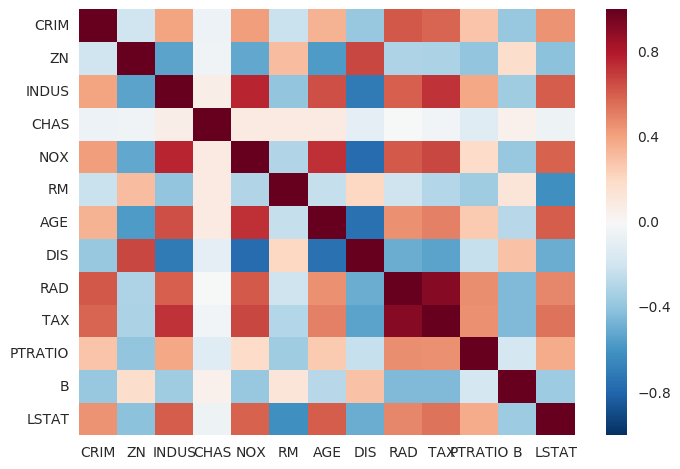

In [22]:
import seaborn as sns

sns.heatmap(df.corr())

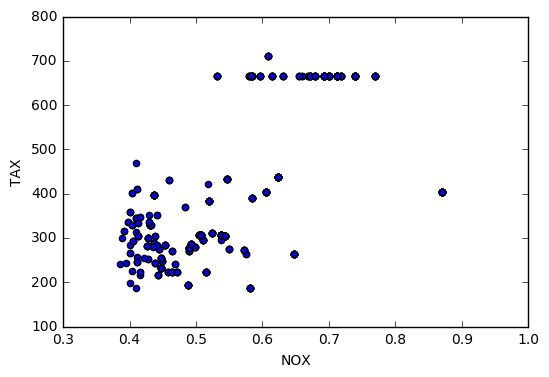

In [14]:
xs = df["NOX"]
ys = df["TAX"]

plt.scatter(xs, ys)
plt.xlabel("NOX")
plt.ylabel("TAX")
plt.show()

### Standardization

Let's apply standardization, transforming our data to have mean zero $(\mu = 0)$ and variance 1 $(\sigma^2 = 1)$ by the formula:

$$ x' = \frac{x - \mu}{\sigma}$$

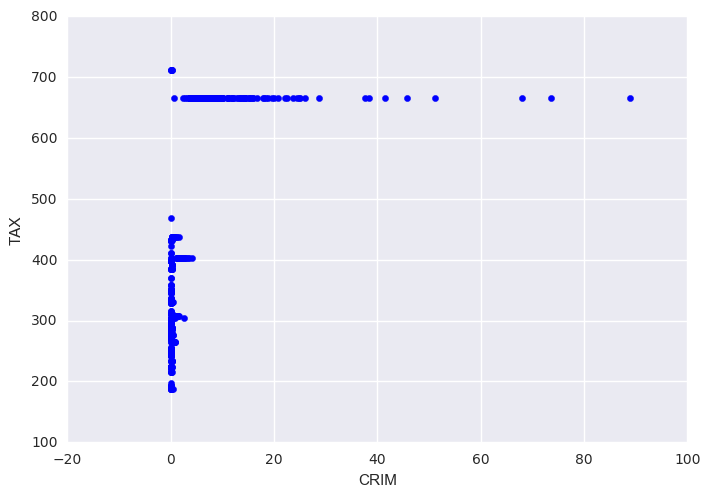

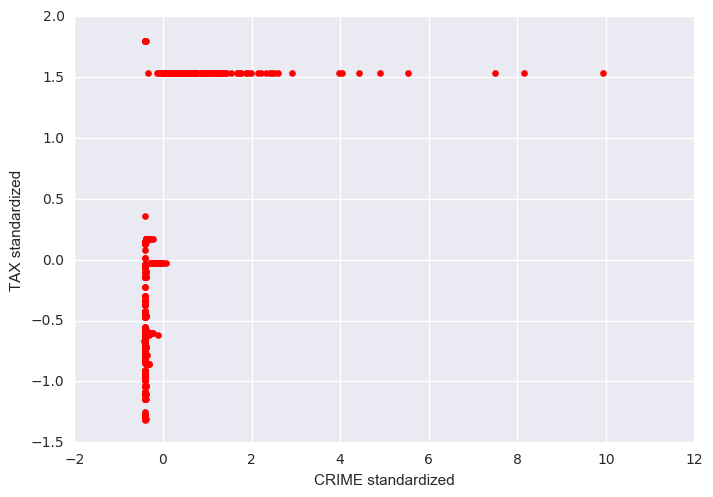

In [28]:
xs = df["CRIM"]
ys = df["TAX"]
plt.scatter(xs, ys, color='b')
plt.xlabel("CRIM")
plt.ylabel("TAX")
plt.show()

xs = df["CRIM"]
mean = np.mean(xs)
std = np.std(xs)
xs = [(x - mean) / std for x in xs]

ys = df["TAX"]
mean = np.mean(ys)
std = np.std(ys)
ys = [(y - mean) / std for y in ys]

plt.scatter(xs, ys, color='r')
plt.xlabel("CRIME standardized")
plt.ylabel("TAX standardized")
plt.show()

As you can see, we did not change the shape of the data, just its scale. You can also use scikit-learn to standardize your data.

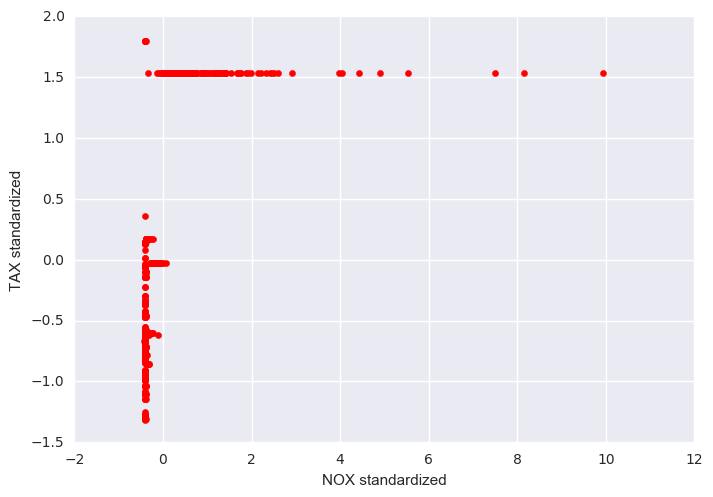

In [29]:
from sklearn import preprocessing

xs = preprocessing.scale(df["CRIM"])
ys = preprocessing.scale(df["TAX"])

plt.scatter(xs, ys, color='r')
plt.xlabel("NOX standardized")
plt.ylabel("TAX standardized")
plt.show()


### Min-Max Scaling

To Min-Max scale our data, we use the formula:

$$x' = \frac{x - x_{min}}{x_{max} - x_{min}}$$

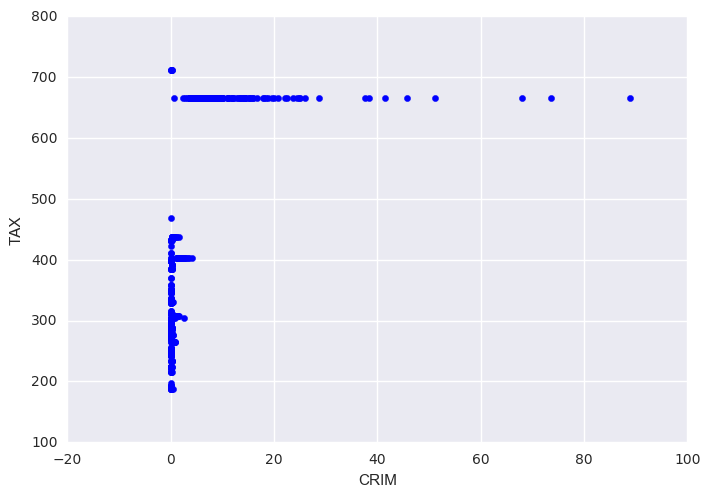

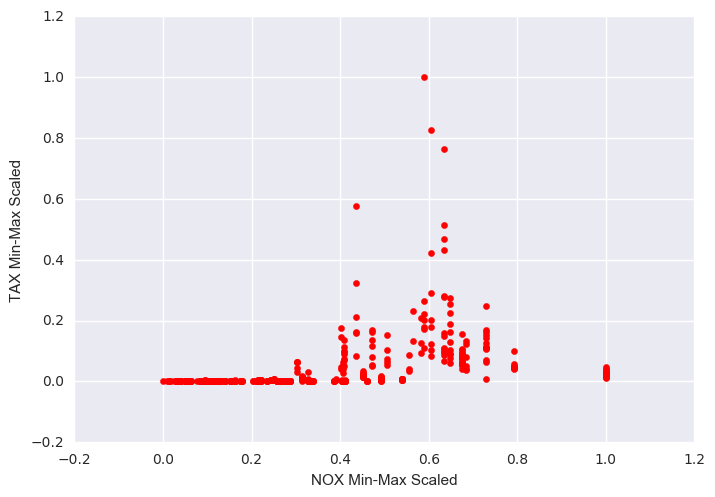

In [30]:
xs = df["CRIM"]
ys = df["TAX"]
plt.scatter(xs, ys, color='b')
plt.xlabel("CRIM")
plt.ylabel("TAX")
plt.show()

xs = df["NOX"]
xmin = np.min(xs)
xmax = np.max(xs)
xs = [(x - xmin) / (xmax - xmin) for x in xs]

ys = df["CRIM"]
ymin = np.min(ys)
ymax = np.max(ys)
ys = [(y - ymin) / (ymax - ymin) for y in ys]

plt.scatter(xs, ys, color='r')
plt.xlabel("NOX Min-Max Scaled")
plt.ylabel("TAX Min-Max Scaled")
plt.show()

In [17]:
We can use scikit-learn to Min-Max Scale.

SyntaxError: invalid syntax (<ipython-input-17-ac938856c8ff>, line 1)

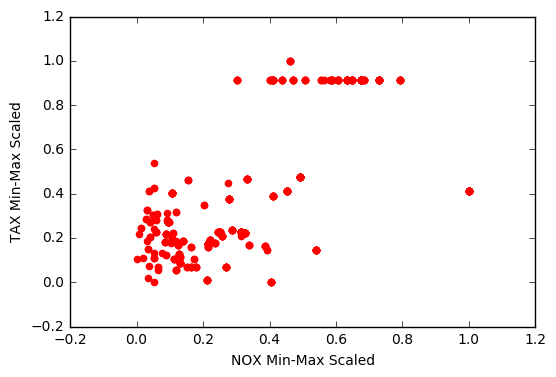

In [18]:
from sklearn import preprocessing

scaler = preprocessing.MinMaxScaler()

xs = scaler.fit_transform(df[["NOX"]])
ys = scaler.fit_transform(df[["TAX"]])

plt.scatter(xs, ys, color='r')
plt.xlabel("NOX Min-Max Scaled")
plt.ylabel("TAX Min-Max Scaled")
plt.show()

### Normalization

We normalize the data by dividing through by some kind of sum or total. For example, it's common to normalize simply by the (*L1*) sum $|X| = \sum_{x \in X}{x}$ or by the (*L2*) euclidean sum of squares distance  $||X|| = \sqrt{\sum_{x \in X}{x^2}}$:

$$x' = \frac{x}{|X|}$$

## Guided Practice

Perform normalization by both the L1 and L2 sums and plot as we did for the other scaling methods.

If you finish early, repeat the exercise [using scikit-learn](http://scikit-learn.org/stable/modules/preprocessing.html#preprocessing-normalization).

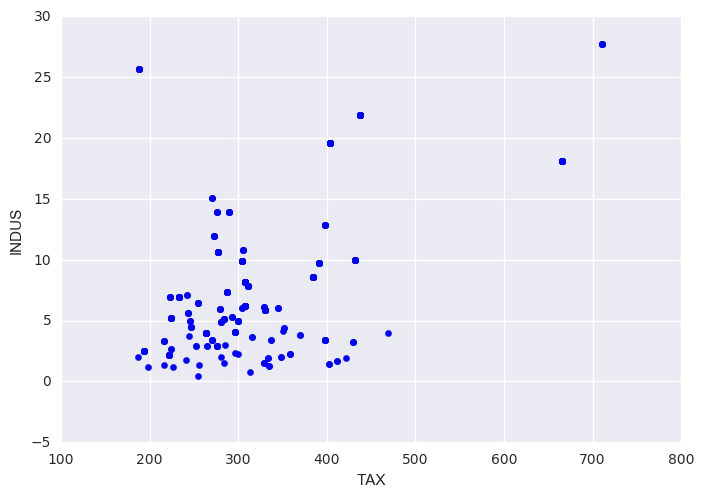

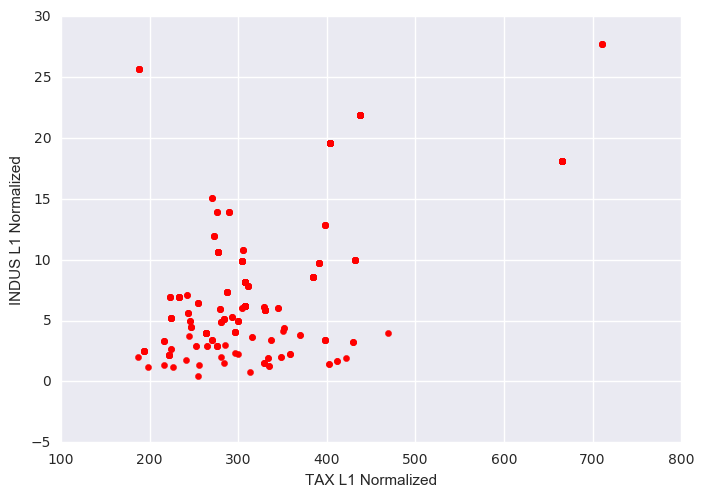

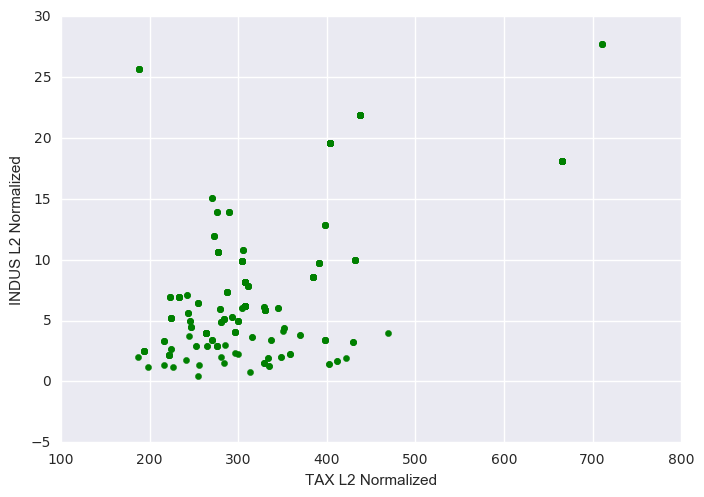

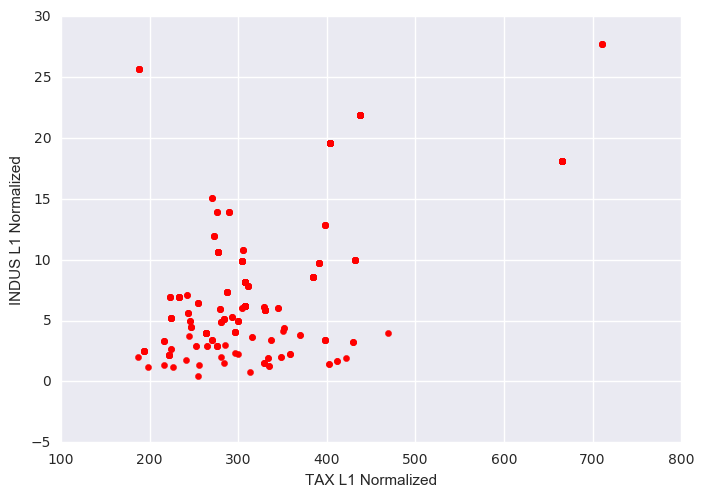

In [25]:
xs = df["TAX"]
ys = df["INDUS"]
plt.scatter(xs, ys, color='b')
plt.xlabel("TAX")
plt.ylabel("INDUS")
plt.show()

xs = df["TAX"]
ys = df["INDUS"]
# Normalize xs and ys with L1 sum

plt.scatter(xs, ys, color='r')
plt.xlabel("TAX L1 Normalized")
plt.ylabel("INDUS L1 Normalized")
plt.show()

xs = df["TAX"]
ys = df["INDUS"]
# Normalize xs and ys with L2 sum

plt.scatter(xs, ys, color='g')
plt.xlabel("TAX L2 Normalized")
plt.ylabel("INDUS L2 Normalized")
plt.show()

# Sklearn
# Use preprocessing.normalize on xs and ys
xs = df["TAX"]
ys = df["INDUS"]

plt.scatter(xs, ys, color='r')
plt.xlabel("TAX L1 Normalized")
plt.ylabel("INDUS L1 Normalized")
plt.show()

### Independent Practice

Let's practice linear fits using feature scaling. For each of the three scaling methods we've discussed:
* Practice scaling and linear fits on the boston housing data using all the data (scaled) versus the target data `boston.target`. Does scaling or normalization affect any of your models? Determine if the model fit score changed. Explain why or why not. (10-20 mins).

Next:
* Try some regularized models. Does scaling have a significant effect on the fit? (10 mins)
* Try some other models from scikit-learn, such as a [SGDRegressor](http://scikit-learn.org/stable/modules/generated/sklearn.linear_model.SGDRegressor.html).
It's ok if you are unfamiliar with the model, just follow the example code
and explore the fit and the effect of scaling. (10 mins)
* Bonus: try a few extra models like a [support vector machine](http://scikit-learn.org/stable/auto_examples/svm/plot_svm_regression.html). What do you think
about the goodness of fit? Scaling is _required_ for this model.

### Bonus Exercises

Using Scikit-learn, fit some other model to the data, for example a regularization model like a Ridge or Lasso, a [SGDRegressor](http://scikit-learn.org/stable/modules/generated/sklearn.linear_model.SGDRegressor.html), or a [support vector machine](http://scikit-learn.org/stable/auto_examples/svm/plot_svm_regression.html). Do any of the scaling methods affect the goodness of fit?

In [ ]:
# These are all basically the same, here's one example.
# The linear regression fit score is not affected by scaling since the coefficients adapt.

df = pd.DataFrame(boston.data, columns=boston.feature_names)
y = boston.target

X = ...


In [ ]:
# Stochastic Regressor -- scaling makes a huge difference
# linear_model.SGDRegressor()

# Unscaled



# Scaled

